<a href="https://colab.research.google.com/github/sivasamy1/Machine_learning_research/blob/main/Stock_price_prediction_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [181]:
df = pd.read_csv("Bitcoin_8_30_2024-8_30_2025_historical_data_coinmarketcap.csv", delimiter=';')
# df = df[df.name == "2781"]

In [182]:
print(tabulate(df.head(10), headers='keys', tablefmt='github'))

|    | timeOpen                 | timeClose                | timeHigh                 | timeLow                  |   name |   open |   high |    low |   close |      volume |   marketCap | timestamp                |
|----|--------------------------|--------------------------|--------------------------|--------------------------|--------|--------|--------|--------|---------|-------------|-------------|--------------------------|
|  0 | 2025-08-29T00:00:00.000Z | 2025-08-29T23:59:59.999Z | 2025-08-29T00:30:00.000Z | 2025-08-29T21:04:00.000Z |   2781 | 112551 | 112619 | 107560 |  108411 | 7.78434e+10 | 2.15881e+12 | 2025-08-29T23:59:59.999Z |
|  1 | 2025-08-28T00:00:00.000Z | 2025-08-28T23:59:59.999Z | 2025-08-28T13:23:00.000Z | 2025-08-28T00:36:00.000Z |   2781 | 111219 | 113450 | 110901 |  112545 | 5.88602e+10 | 2.24121e+12 | 2025-08-28T23:59:59.999Z |
|  2 | 2025-08-27T00:00:00.000Z | 2025-08-27T23:59:59.999Z | 2025-08-27T14:36:00.000Z | 2025-08-27T08:50:00.000Z |   2781 | 111796 | 112

In [183]:
forecast_col = 'open'
forecast_out = 10
test_size = 0.19

In [184]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method where the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train) #training the linear regression model

LinearRegression()

In [185]:
score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_lately) #set that will contain the forecasted data
response={}#creting json object
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': 0.919033843400464, 'forecast_set': array([54248.79934948, 53559.18666168, 53364.39244845, 55530.44662825,
       57305.05341165, 56774.72801307, 58416.4277645 , 56673.45297724,
       58282.81472473, 58427.48600147])}


In [186]:
forecast_col1 = 'close'
forecast_out1 = 10
test_size1 = 0.19

In [187]:
X_train1, X_test1, Y_train1, Y_test1 , X_lately1 =prepare_data(df,forecast_col1,forecast_out1,test_size1); #calling the method where the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train1,Y_train1) #training the linear regression model

LinearRegression()

In [188]:
score1=learner.score(X_test1,Y_test1)#testing the linear regression model
forecast1= learner.predict(X_lately1) #set that will contain the forecasted data
response['test_score1']=score1
response['forecast_set1']=forecast1

print(response)

{'test_score': 0.919033843400464, 'forecast_set': array([54248.79934948, 53559.18666168, 53364.39244845, 55530.44662825,
       57305.05341165, 56774.72801307, 58416.4277645 , 56673.45297724,
       58282.81472473, 58427.48600147]), 'test_score1': 0.9225925636644504, 'forecast_set1': array([56544.33838562, 54422.06932971, 53738.14221936, 53552.08803944,
       55707.26016658, 57471.99784899, 56945.3032198 , 58583.75818047,
       56842.46687928, 58444.82340995])}


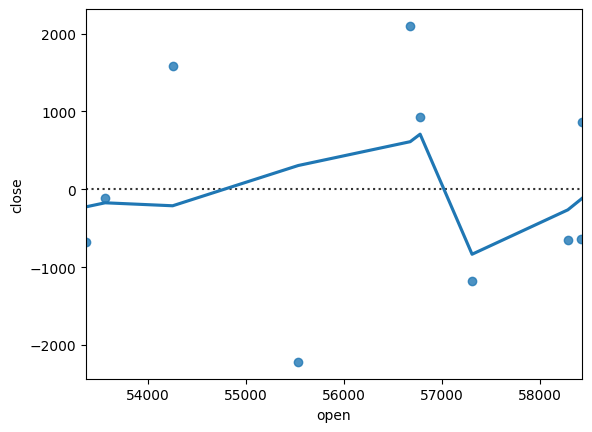

In [189]:
sns.residplot(x='forecast_set', y='forecast_set1', lowess = True)
plt.xlabel("open")
plt.ylabel("close")
plt.show()

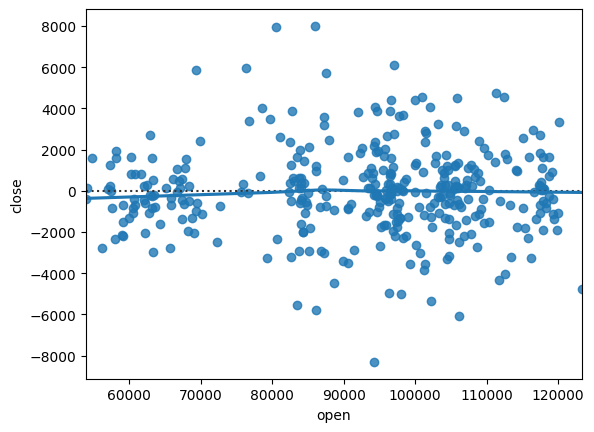

In [190]:
sns.residplot(x='open', y='close', data=df, lowess = True)
plt.xlabel("open")
plt.ylabel("close")
plt.show()

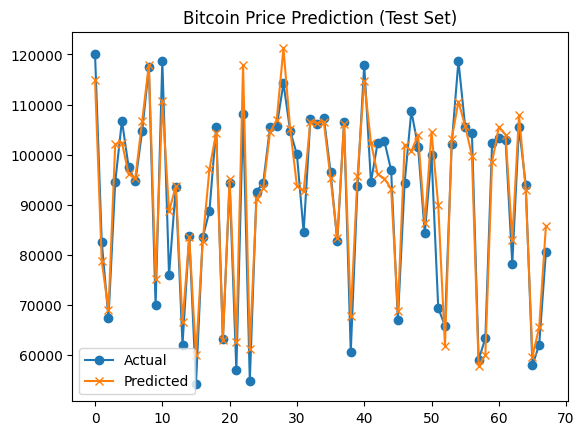

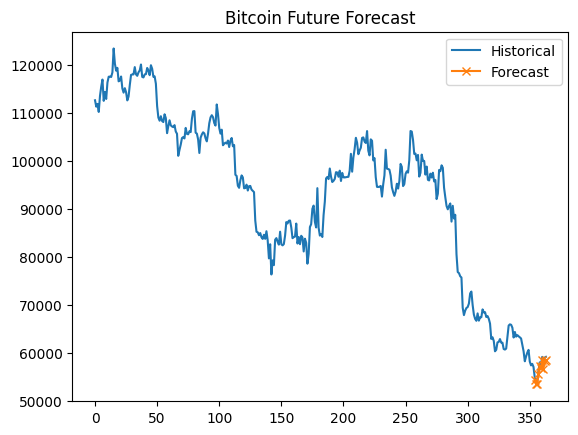

In [192]:
import matplotlib.pyplot as plt

# Plot actual vs predicted for test set
plt.plot(Y_test, label="Actual", marker='o')
plt.plot(learner.predict(X_test), label="Predicted", marker='x')
plt.legend()
plt.title("Bitcoin Price Prediction (Test Set)")
plt.show()

# Plot forecast for future dates
future_index = df.index[-forecast_out:]
plt.plot(df[forecast_col].values, label="Historical")
plt.plot(future_index, forecast, label="Forecast", marker='x')
plt.legend()
plt.title("Bitcoin Future Forecast")
plt.show()
